<a href="https://colab.research.google.com/github/ramakanth-rayanchi/CB-DL-01/blob/main/Classify_Handwritten_Digits_Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

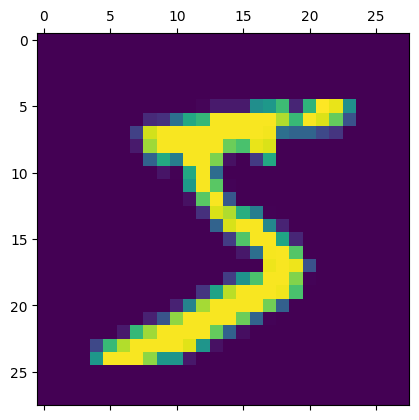

In [7]:
plt.matshow(X_train[0])

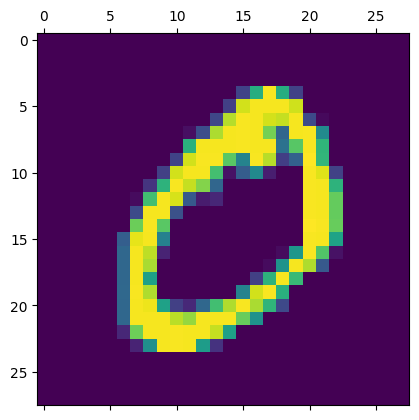

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
#flatten our training dataset using reshape
X_train_flattened =  X_train.reshape(len(X_train), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [14]:
#flatten our test dataset using reshape
X_test_flattened =  X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
# Check 1st element
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [16]:
from keras.engine.training import optimizer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8431 - accuracy: 0.8403
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0630 - accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6172 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5012 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3328 - accuracy: 0.8867


In [17]:
 # Accuracy is low compared to expected

Lets do rescaling of training and test b/w 0 and 1 instead of values upto 255 to improve the accuracy.

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
# Sample Output of X_train
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
# Lets repeat the earlier steps again
# flatten our training dataset using reshape
X_train_flattened =  X_train.reshape(len(X_train), 28*28)

print(X_train_flattened.shape)

#flatten our test dataset using reshape
X_test_flattened =  X_test.reshape(len(X_test), 28*28)
print(X_test_flattened.shape)

from keras.engine.training import optimizer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

(60000, 784)
(10000, 784)
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4666 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9252


Now the training accuracy improved from 88% to 92.52% by scaling technique

In [21]:
# lets evaluate on test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9268


[0.26559367775917053, 0.926800012588501]

Test Accuracy is also 92.6% (similar to training accuarcy) which is good. 

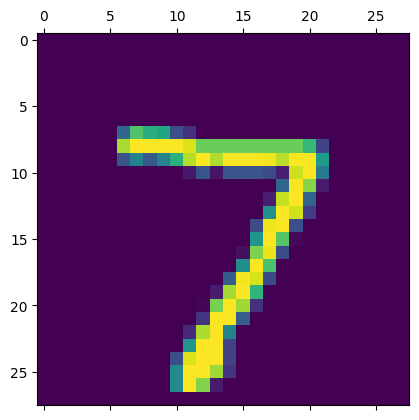

In [23]:
# lets do prediction for 1st image
plt.matshow(X_test[0])

In [26]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [27]:
y_predicted[0]

array([1.37368934e-02, 2.92284255e-07, 4.78577800e-02, 9.52893317e-01,
       1.85056345e-03, 1.13139816e-01, 1.65137453e-06, 9.99798059e-01,
       1.04808234e-01, 5.80691755e-01], dtype=float32)

10 Scores are given for the 1st point. Predicted value is the highest number is the array.

In [28]:
np.argmax(y_predicted[0])

7

1st Image is 7 and predicted is 7. Lets try for 2nd image

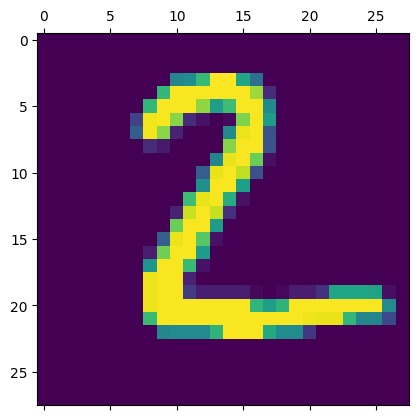

In [29]:
# lets do prediction for 1st image
plt.matshow(X_test[1])

In [30]:
np.argmax(y_predicted[1])

2

2st Image is 2 and predicted is 2.

In [31]:
# Currently y_predicted is array and not a single value
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print("y_predicted_labels Sample =", y_predicted_labels[:5])
print("y_test Sample =", y_test[:5])


y_predicted_labels Sample = [7, 2, 1, 0, 4]
y_test Sample = [7 2 1 0 4]


In [32]:
# Lets build the confusion matrix to view the performance of the model

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    4,    4,    0,    7,   10,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    9,  928,   18,    6,    2,   13,    9,   39,    5],
       [   1,    0,   20,  931,    0,   23,    2,    9,   15,    9],
       [   1,    1,    6,    2,  892,    0,   12,    4,   10,   54],
       [   9,    2,    3,   35,    8,  774,   19,    5,   30,    7],
       [   8,    3,    7,    1,    7,   11,  918,    2,    1,    0],
       [   1,    5,   21,   10,    4,    0,    0,  946,    3,   38],
       [   5,    7,    7,   23,    9,   22,    9,   10,  874,    8],
       [   8,    7,    2,   10,   15,    6,    0,   14,    6,  941]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

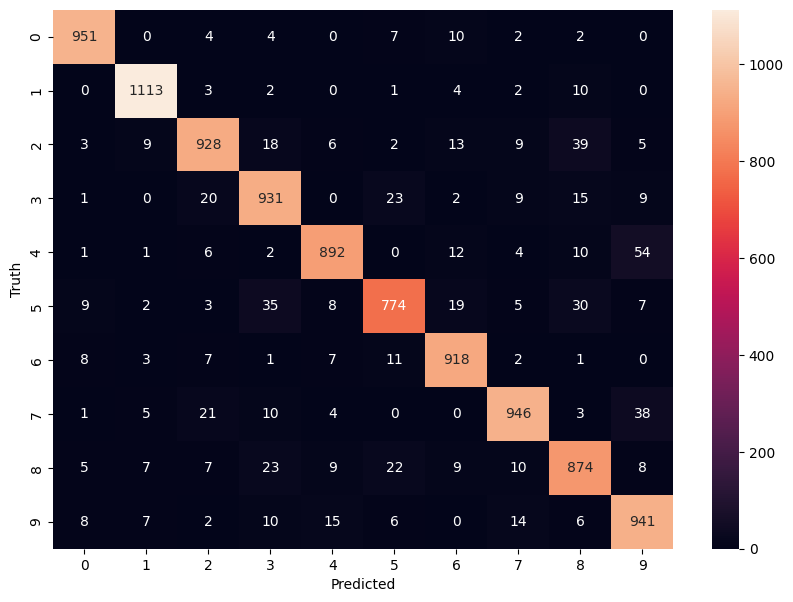

In [33]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Lets add a hidden layer into this

Last layer does not need a hidden layer
But first layer - input neurons are 784, but need to specifiy number of neurons in hidden layer. Typically trial and error and less than input number of neurons. Lets start with 100.
lets use first layer activation fn be 'Relu'

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2738 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1218 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0862 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0519 - accuracy: 0.9845


Using Hidden layer increases time to run to train the model. Here only 1 hidden layer but extra hidden layer can be added.
lets evaluate test accuracy

In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9718


[0.09051696956157684, 0.9718000292778015]

Test Accuracy increased to 97.18% 

In [39]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [40]:
## Currently y_predicted is array and not a single value
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print("y_predicted_labels Sample =", y_predicted_labels[:5])
print("y_test Sample =", y_test[:5])

y_predicted_labels Sample = [7, 2, 1, 0, 4]
y_test Sample = [7 2 1 0 4]


In [41]:
# Lets build the confusion matrix to view the performance of the model

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    2,    0,    2,    0,    2,    1],
       [   0, 1121,    4,    0,    0,    2,    3,    0,    5,    0],
       [  10,    3,  970,    6,    2,    3,    4,   13,   20,    1],
       [   0,    0,    3,  982,    0,    5,    2,    4,   10,    4],
       [   3,    0,    0,    1,  949,    1,    5,    3,    0,   20],
       [   2,    0,    0,    6,    1,  875,    3,    0,    3,    2],
       [   8,    3,    0,    1,    5,    3,  934,    0,    4,    0],
       [   1,    7,    5,    2,    0,    0,    0,  997,    4,   12],
       [   4,    1,    1,    2,    4,   15,    2,    3,  934,    8],
       [   3,    3,    0,    3,    4,    6,    0,    4,    2,  984]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

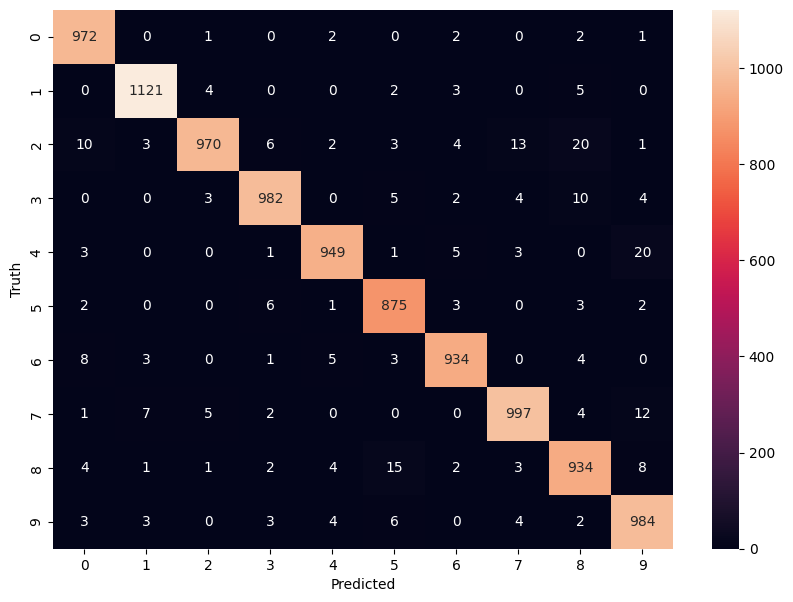

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

If we do not wish to flatten the dataset, there is an option in keras

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2801 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1267 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0667 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9842


Try to work with different losses, activation, optimizers, metrics 

https://www.tensorflow.org/api_docs/python/tf/keras/losses

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

https://www.tensorflow.org/api_docs/python/tf/keras/activations

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers